### Early Stopping


It is used, to stop the epochs at the perfect spot, because if we randomly give a very huge value of epochs it starts overfitting
Hence, early stopping prevents overfitting in the model.

In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
# from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [42]:
X,y = make_circles(n_samples=100, noise=0.1, random_state=41)

<Axes: >

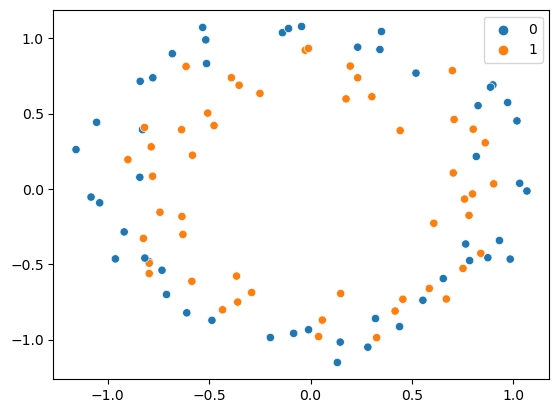

In [43]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [45]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               768       
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# Check the keras page for more detail.

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0, # After how many Epochs do you want it to check
    verbose=1,  # Keep this one, it prints early stopping after how many epochs 
    mode="auto",
    baseline=None,
    restore_best_weights=False, 
    start_from_epoch=0,
)

In [49]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50000, callbacks=callback)

Epoch 1/50000


3/3 [==============================] - 0s 41ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6995 - val_accuracy: 0.4500
Epoch 2/50000
3/3 [==============================] - 0s 10ms/step - loss: 0.6915 - accuracy: 0.5250 - val_loss: 0.7046 - val_accuracy: 0.4000
Epoch 2: early stopping


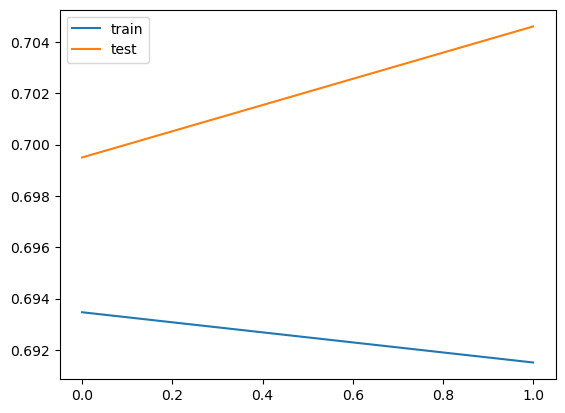

In [50]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()